In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file=open("data.txt")

In [ ]:
frame=[]
for i in file.readlines():
    frame.append(i[:-1].split(","))

In [ ]:
df=pd.DataFrame(frame)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.iloc[767][8]=0

# Preprocessing and feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       768 non-null    object
 1   1       768 non-null    object
 2   2       768 non-null    object
 3   3       768 non-null    object
 4   4       768 non-null    object
 5   5       768 non-null    object
 6   6       768 non-null    object
 7   7       768 non-null    object
 8   8       768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [ ]:
df=df.astype(str).astype(float)

In [ ]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Infromation Extraction

In [ ]:
df[8].unique()

array([1., 0.])

**As we don't have any information about the data let's try to extract information**

<AxesSubplot:>

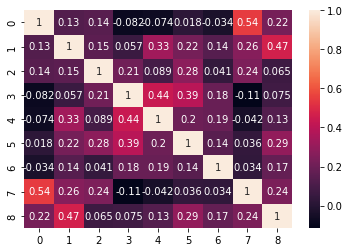

In [ ]:
sns.heatmap(df.corr(),annot=True)

**dataset is not correlated, this is not usefull lets try pairplot**

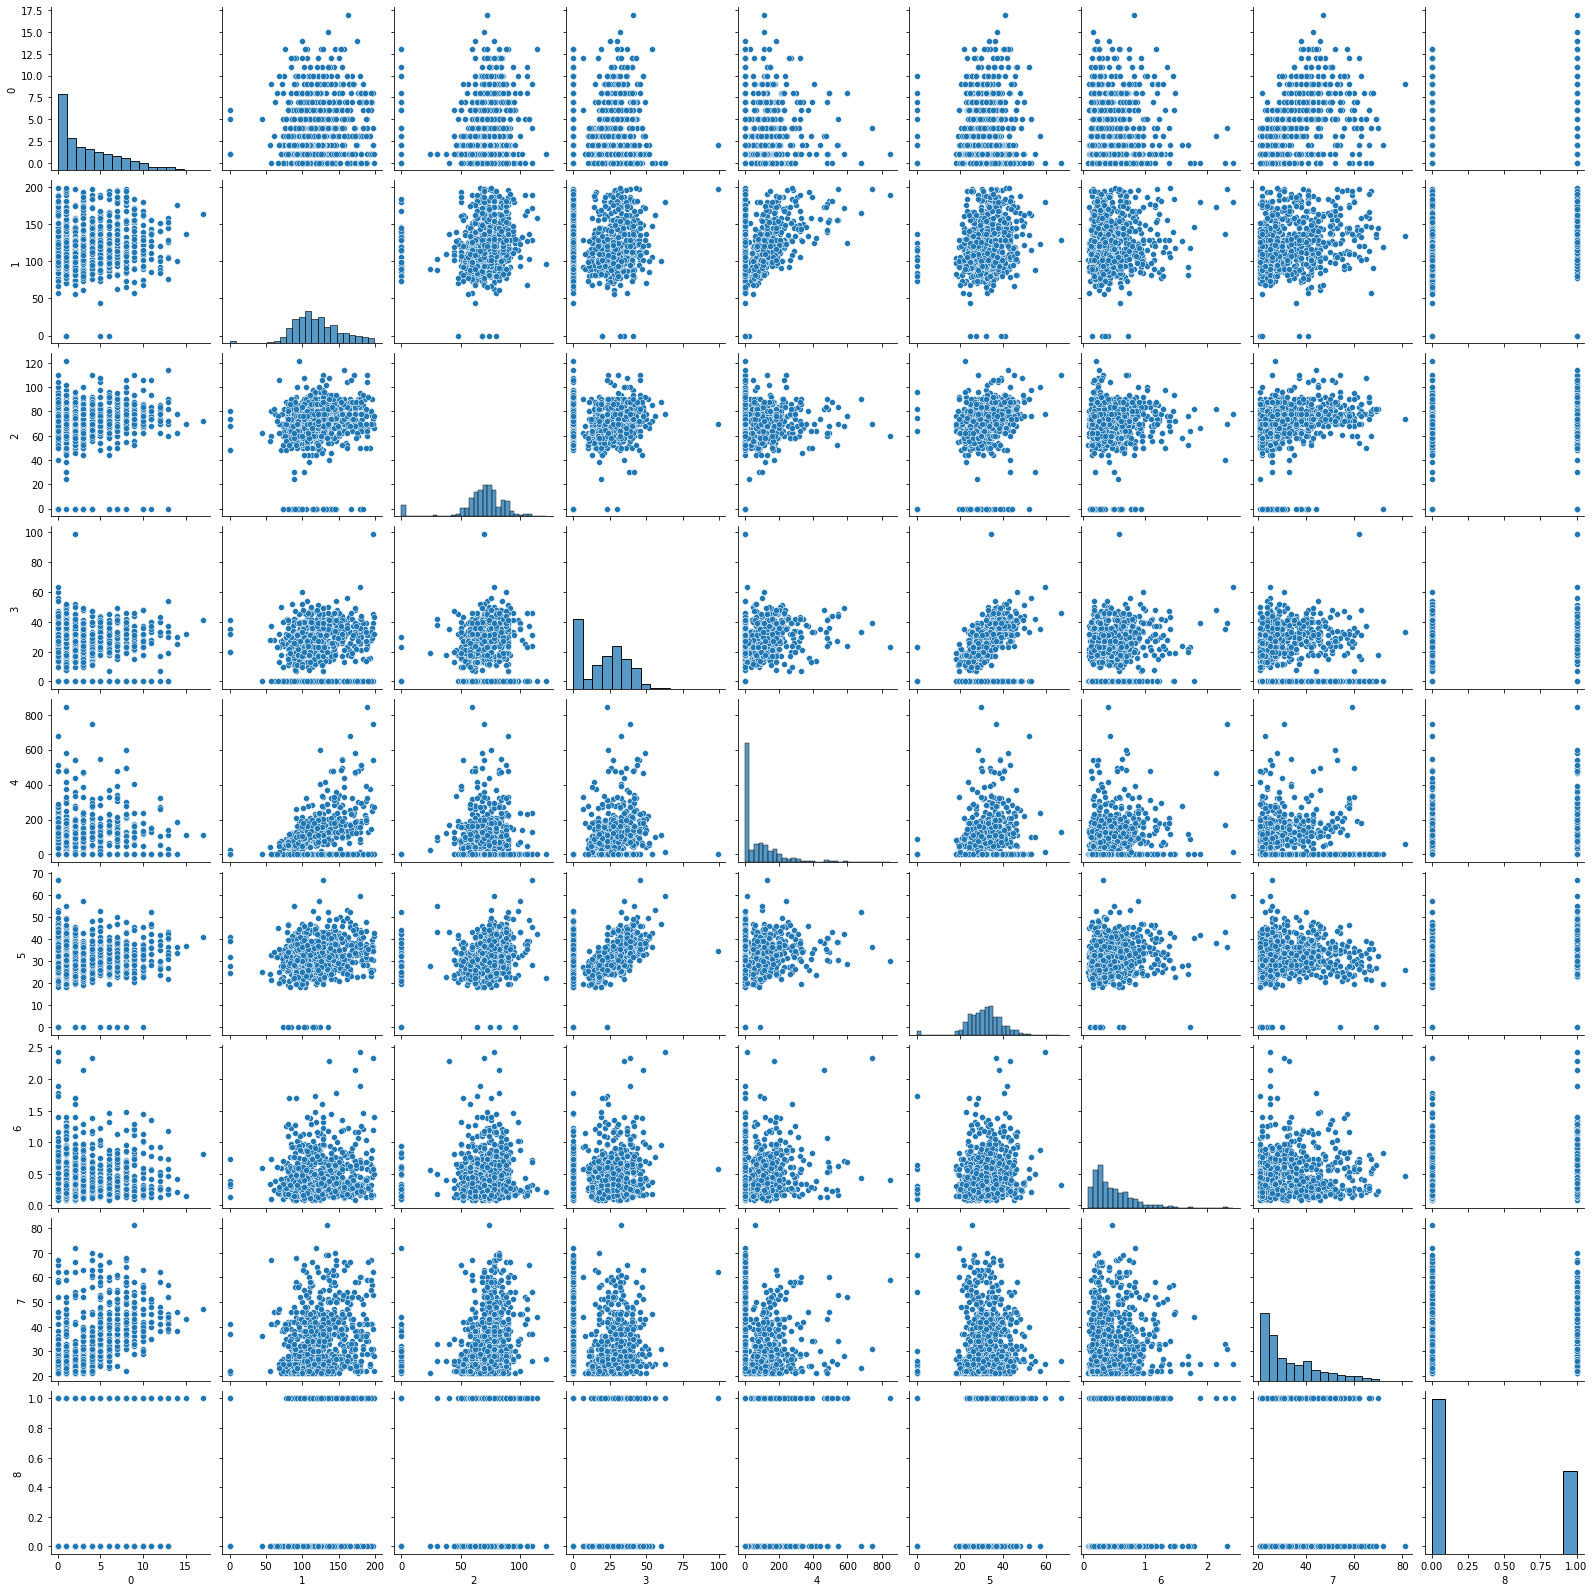

In [ ]:
sns.pairplot(df)

**Shapes are meaningful but as I don't have any information about the data I can not trace it**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(0,axis=1).values,df[8].values)

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics 

In [ ]:
model1 = Sequential()
model1.add(Dense(15,"relu"))
model1.add(Dense(10,"relu"))
model1.add(Dense(5,"relu"))
model1.add(Dense(1,"sigmoid"))
model1.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model1.fit(xtrain,ytrain,epochs=1000,validation_data=(xtest,ytest))

Epoch 1/1000
18/18 [==============================] - 1s 15ms/step - loss: 3.0535 - val_loss: 2.5219
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.5911 - val_loss: 1.5781
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0896 - val_loss: 1.2504
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9136 - val_loss: 0.9955
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.8159 - val_loss: 0.8974
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7522 - val_loss: 0.8782
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.7191 - val_loss: 0.8029
Epoch 8/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6848 - val_loss: 0.7764
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6673 - val_loss: 0.7551
Epoch 10/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6521 - val_loss: 0.741

18/18 [==============================] - 0s 3ms/step - loss: 0.4214 - val_loss: 0.5209
Epoch 83/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4185 - val_loss: 0.5170
Epoch 84/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4128 - val_loss: 0.5206
Epoch 85/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4085 - val_loss: 0.5089
Epoch 86/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4001 - val_loss: 0.4944
Epoch 87/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4028 - val_loss: 0.5067
Epoch 88/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4080 - val_loss: 0.5028
Epoch 89/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3885 - val_loss: 0.4823
Epoch 90/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3790 - val_loss: 0.4656
Epoch 91/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3715 - val_loss: 0.4715
Epoc

18/18 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.1052
Epoch 163/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1013
Epoch 164/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.1035
Epoch 165/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1073
Epoch 166/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1005
Epoch 167/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.0973
Epoch 168/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0978
Epoch 169/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0998
Epoch 170/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.0971
Epoch 171/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0529
Epoch 243/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.0529
Epoch 244/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0526
Epoch 245/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0277 - val_loss: 0.0526
Epoch 246/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0525
Epoch 247/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0525
Epoch 248/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0528
Epoch 249/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0524
Epoch 250/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0524
Epoch 251/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.

Epoch 322/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0526
Epoch 323/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.0526
Epoch 324/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0526
Epoch 325/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0527
Epoch 326/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0525
Epoch 327/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0526
Epoch 328/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0527
Epoch 329/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0525
Epoch 330/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.0526
Epoch 331/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0256

18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0538
Epoch 403/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0538
Epoch 404/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0538
Epoch 405/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0539
Epoch 406/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0539
Epoch 407/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0539
Epoch 408/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0539
Epoch 409/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0252 - val_loss: 0.0539
Epoch 410/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.0539
Epoch 411/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0251 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0548
Epoch 483/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0548
Epoch 484/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0548
Epoch 485/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0548
Epoch 486/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0549
Epoch 487/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0549
Epoch 488/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0549
Epoch 489/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0549
Epoch 490/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0549
Epoch 491/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0553
Epoch 563/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0553
Epoch 564/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 565/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 566/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 567/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 568/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0553
Epoch 569/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 570/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 571/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 643/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 644/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 645/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 646/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 647/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 648/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 649/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 650/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0556
Epoch 651/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 723/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 724/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 725/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 726/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 727/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 728/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 729/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 730/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0557
Epoch 731/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.

18/18 [==============================] - 0s 3ms/step - loss: 6.1664e-05 - val_loss: 8.3582e-05
Epoch 800/1000
18/18 [==============================] - 0s 3ms/step - loss: 6.0639e-05 - val_loss: 8.2171e-05
Epoch 801/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.9107e-05 - val_loss: 8.1923e-05
Epoch 802/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.8013e-05 - val_loss: 8.0994e-05
Epoch 803/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.6795e-05 - val_loss: 8.0328e-05
Epoch 804/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.5883e-05 - val_loss: 7.9356e-05
Epoch 805/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4707e-05 - val_loss: 7.8488e-05
Epoch 806/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.3803e-05 - val_loss: 7.7693e-05
Epoch 807/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.2723e-05 - val_loss: 7.7113e-05
Epoch 808/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 2.3728e-05 - val_loss: 1.5616e-04
Epoch 874/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3506e-05 - val_loss: 1.4746e-04
Epoch 875/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3270e-05 - val_loss: 1.5211e-04
Epoch 876/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.3099e-05 - val_loss: 1.5708e-04
Epoch 877/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2857e-05 - val_loss: 1.6278e-04
Epoch 878/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2671e-05 - val_loss: 1.4918e-04
Epoch 879/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2434e-05 - val_loss: 1.5321e-04
Epoch 880/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2254e-05 - val_loss: 1.5695e-04
Epoch 881/1000
18/18 [==============================] - 0s 3ms/step - loss: 2.2054e-05 - val_loss: 1.5750e-04
Epoch 882/1000
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 1.2978e-05 - val_loss: 1.4274e-04
Epoch 948/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2859e-05 - val_loss: 1.3056e-04
Epoch 949/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2766e-05 - val_loss: 1.2850e-04
Epoch 950/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2671e-05 - val_loss: 1.3421e-04
Epoch 951/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2585e-05 - val_loss: 1.3960e-04
Epoch 952/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2488e-05 - val_loss: 1.4643e-04
Epoch 953/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2397e-05 - val_loss: 1.0749e-04
Epoch 954/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2302e-05 - val_loss: 1.0877e-04
Epoch 955/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.2206e-05 - val_loss: 1.1310e-04
Epoch 956/1000
18/18 [===

<AxesSubplot:>

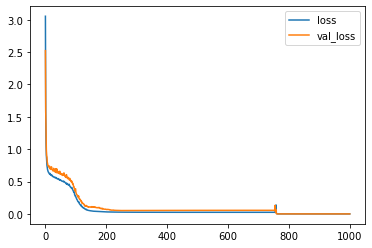

In [ ]:
pd.DataFrame(model1.history.history).plot()

# wierd(ask about this)

In [ ]:
prediction_model1=model1.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Evaluation model 1

In [ ]:
metrics.confusion_matrix(prediction_model1,ytest)

array([[116,   0],
       [  0,  76]], dtype=int64)

://///////////////////////////

In [ ]:
print(metrics.classification_report(prediction_model1,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        76

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192

